### Exercise 1 - ANOVA F-test and Hierarchical Clustering

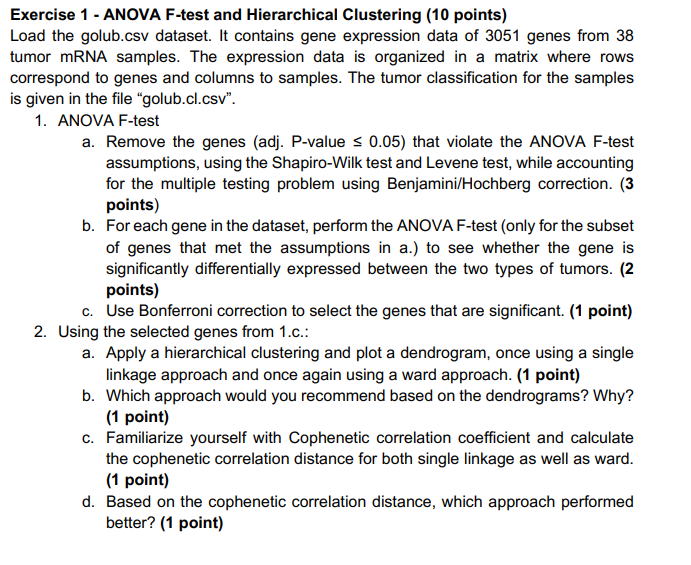

#### 1- ANOVA F-test

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as spy
import statsmodels.stats.multitest as sss


In [2]:
data = pd.read_csv('golub.csv', index_col='gene_name')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3051 entries, AFFX-HUMISGF3A/M97935_MA_at to M71243_f_at
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3051 non-null   float64
 1   V2      3051 non-null   float64
 2   V3      3051 non-null   float64
 3   V4      3051 non-null   float64
 4   V5      3051 non-null   float64
 5   V6      3051 non-null   float64
 6   V7      3051 non-null   float64
 7   V8      3051 non-null   float64
 8   V9      3051 non-null   float64
 9   V10     3051 non-null   float64
 10  V11     3051 non-null   float64
 11  V12     3051 non-null   float64
 12  V13     3051 non-null   float64
 13  V14     3051 non-null   float64
 14  V15     3051 non-null   float64
 15  V16     3051 non-null   float64
 16  V17     3051 non-null   float64
 17  V18     3051 non-null   float64
 18  V19     3051 non-null   float64
 19  V20     3051 non-null   float64
 20  V21     3051 non-null   float64
 21  V22     3

There is no Null values and all values are float64. So, we are ready to proceed

a.  Remove  the  genes  (adj.  P-value  ≤  0.05)  that  violate  the  ANOVA  F-test 
assumptions, using the Shapiro-Wilk test and Levene test, while accounting 
for  the  multiple  testing  problem  using  Benjamini/Hochberg  correction.  (3 
points)

In [3]:
# Perform Shapiro Wirk Test for samples of each Gene and Levene test for samples of the 2 tumor-classes of each gene
for i in data.index.values.tolist():
    data.loc[i,'shapiro_p_value'] = spy.shapiro(data.loc[i,'V1':'V38'])[1]
    data.loc[i,'Levene_p_value'] = spy.levene(data.loc[i,'V1':'V27'], data.loc[i,'V28':'V38'])[1]
    
data[['shapiro_p_value', 'Levene_p_value']].head()

,shapiro_p_value,Levene_p_value
gene_name,,
AFFX-HUMISGF3A/M97935_MA_at,4.144559e-09,0.034294
AFFX-HUMISGF3A/M97935_MB_at,4.930591e-06,0.193135
AFFX-HUMISGF3A/M97935_3_at,2.167703e-01,0.578461
AFFX-HUMRGE/M10098_5_at,1.381638e-02,0.004012
AFFX-HUMRGE/M10098_M_at,7.677478e-04,0.087218


In [4]:
# Perform Benjamini/Hochberg correction for p values of Shapiro & Levene tests

data['corr_shapiro'] = sss.fdrcorrection(data['shapiro_p_value'])[1]
data['corr_levene'] = sss.fdrcorrection(data['Levene_p_value'])[1]

data[['corr_shapiro', 'corr_levene']].head()

,corr_shapiro,corr_levene
gene_name,,
AFFX-HUMISGF3A/M97935_MA_at,1.708791e-07,0.329588
AFFX-HUMISGF3A/M97935_MB_at,4.437532e-05,0.605360
AFFX-HUMISGF3A/M97935_3_at,3.106464e-01,0.845163
AFFX-HUMRGE/M10098_5_at,3.446752e-02,0.109385
AFFX-HUMRGE/M10098_M_at,3.230895e-03,0.465211


In [5]:
# Filter genes that has shapiro p value and Levene p value > 0.05 (comply with ANOVA assumptions)
data_cleared = data[(data['corr_shapiro'] > 0.05) & (data['corr_levene'] > 0.05)].copy()

data_cleared[['corr_shapiro', 'corr_levene']].describe()

,corr_shapiro,corr_levene
count,1718.000000,1718.000000
mean,0.415532,0.737218
std,0.283615,0.205854
min,0.050587,0.061085
25%,0.161534,0.610960
50%,0.348217,0.776004
75%,0.641194,0.909728
max,0.999150,0.999816


b.  For each gene in the dataset, perform the ANOVA F-test (only for the subset 
of  genes  that  met  the  assumptions  in  a.)  to  see  whether  the  gene  is 
significantly  differentially  expressed  between  the  two  types  of  tumors.  (2 
points)

In [13]:
# For each gene in the dataset, perform the ANOVA F-test
for i in data_cleared.index.values.tolist():
    data_cleared.loc[i,'anova_p_value'] = spy.f_oneway(data_cleared.loc[i,'V1':'V27'].values, data_cleared.loc[i,'V28':'V38'].values)[1]

data_cleared[['anova_p_value']].head()

,anova_p_value
gene_name,
AFFX-HUMISGF3A/M97935_3_at,0.913031
AFFX-HUMTFRR/M11507_5_at,0.000072
AFFX-M27830_5_at,0.726501
AFFX-M27830_M_at,0.878498
AFFX-M27830_3_at,0.704919


c.  Use Bonferroni correction to select the genes that are significant. (1 point)

In [7]:
# Perform Bonferroni correction.
data_cleared['corr_anova'] = sss.multipletests(data_cleared['anova_p_value'], method='bonferroni')[1]

data_cleared[['anova_p_value', 'corr_anova']].head()

,anova_p_value,corr_anova
gene_name,,
AFFX-HUMISGF3A/M97935_3_at,0.913031,1.000000
AFFX-HUMTFRR/M11507_5_at,0.000072,0.124212
AFFX-M27830_5_at,0.726501,1.000000
AFFX-M27830_M_at,0.878498,1.000000
AFFX-M27830_3_at,0.704919,1.000000


In [8]:
# select the genes that are significant (p Value <= 0.05).
significant_genes = data_cleared[data_cleared['corr_anova'] <= 0.05].copy()

significant_genes['corr_anova'].describe()

count    63.000000
mean      0.012825
std       0.015709
min       0.000002
25%       0.000803
50%       0.004808
75%       0.021649
max       0.049694
Name: corr_anova, dtype: float64

#### 2- Using the selected genes from 1.c.:

a.  Apply a hierarchical clustering and plot a dendrogram, once using a single 
linkage approach and once again using a ward approach. (1 point)

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

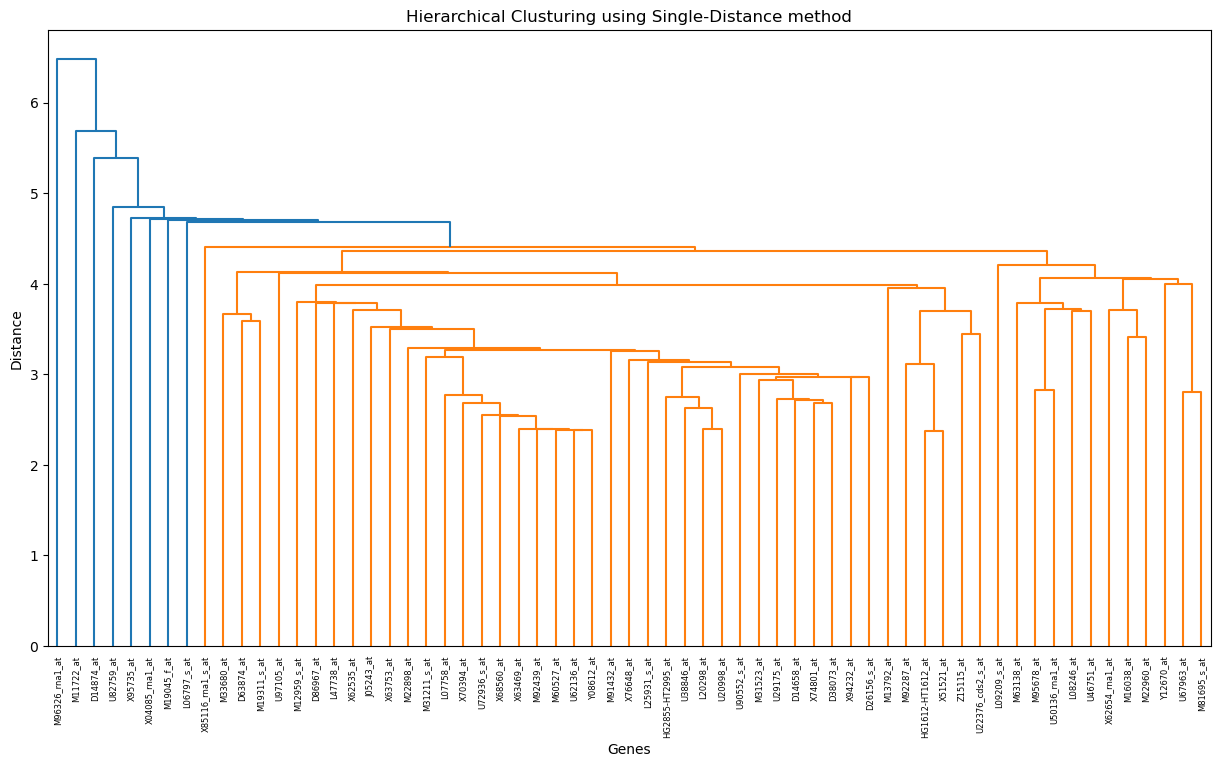

In [10]:
plt.figure(figsize=(15,8))

# Perform Hierarchical Clustering using 'Single' Approach
single = linkage(significant_genes.loc[:,'V1':'V38'].values, method='single')
dendrogram(single, leaf_font_size=6, leaf_rotation=90, labels=significant_genes.index.values)

plt.title('Hierarchical Clusturing using Single-Distance method')
plt.ylabel('Distance')
plt.xlabel('Genes')
plt.show()

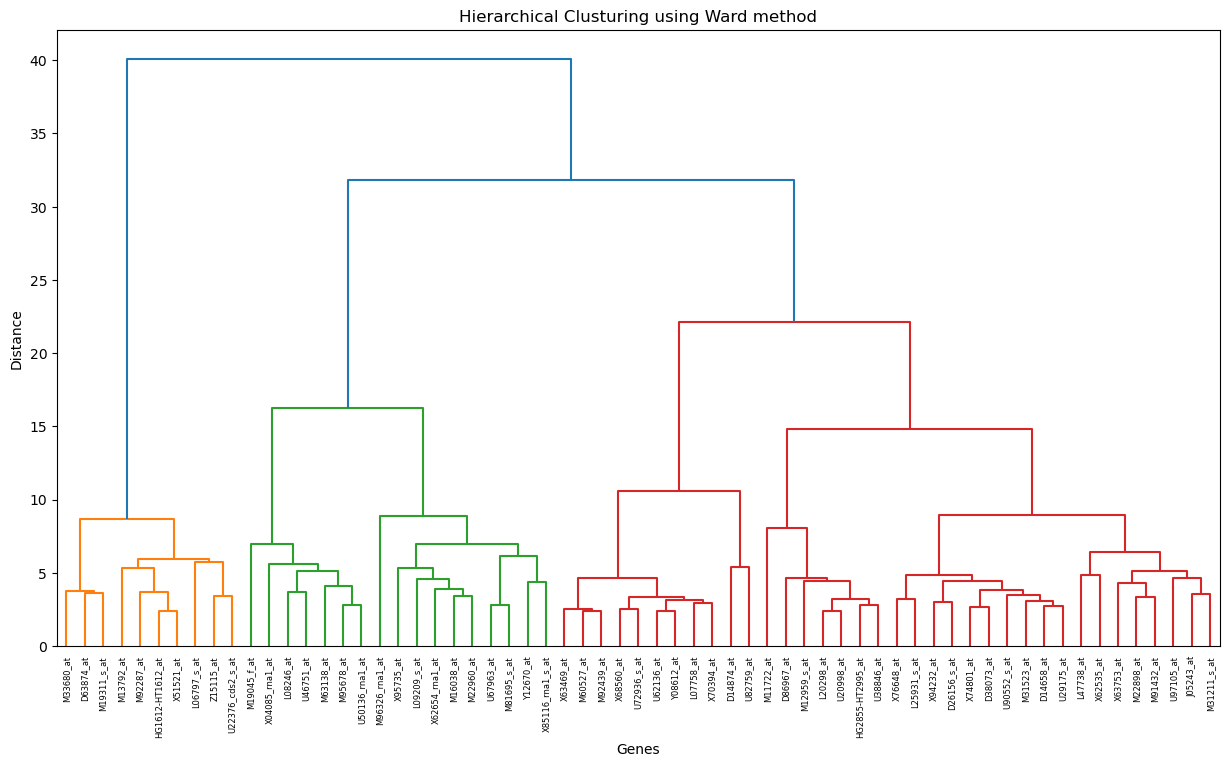

In [11]:
plt.figure(figsize=(15,8))

# Perform Hierarchical Clustering using 'Ward' Approach
ward = linkage(significant_genes.loc[:,'V1':'V38'].values, method='ward')
dendrogram(ward, leaf_font_size=6, leaf_rotation=90, labels=significant_genes.index.values)

plt.title('Hierarchical Clusturing using Ward method')
plt.ylabel('Distance')
plt.xlabel('Genes')
plt.show()

b.  Which approach would you recommend based on the dendrograms? Why? 
(1 point)

Answer: I will choose to use ward approach for hierarichal clustering, as the acquired clusters are more meaningful.

In [12]:
coph_single = cophenet(single, pdist(significant_genes.loc[:,'V1':'V38'].values))
coph_ward = cophenet(ward, pdist(significant_genes.loc[:,'V1':'V38'].values))

print("Cophenetic correlation distance (single linkage):", round(coph_single[0], 3))
print("Cophenetic correlation distance (Ward's method):", round(coph_ward[0],3))

Cophenetic correlation distance (single linkage): 0.472
Cophenetic correlation distance (Ward's method): 0.705


The cophenetic correlation coefficient measures how faithfully a dendrogram preserves the pairwise distances between the original data points. as we see, The cophenetic correlation coefficient of the 'Ward' linkage is higher than the one of 'Single' linkage, and a high value (close to 1) suggests that the dendrogram accurately reflects the pairwise distances between the original data points.

__Therefore, The Ward Approach perfomed better than the Single Approach__